<h2 style="color:#22198A">About</h2>

<h3 style="color:green">About project-04</h3>
<p> In this project, we use data from TweetEval repository to train NLP models with following classification tasks:
<ul>
<li>Hate detection: Is given tweet hateful or not? (Binary Classification)</li>
<li>Sentiment analysis: Is the tweet negative, neutral or positive? (Multiclass classification)</li>
</ul> 
<p><b>Contact:</b> jtih@itu.dk, joap@itu.dk, luci@itu.dk</p>
<p><b>Created:</b> 06. 05. 2021</p>
<p><b>Last modified:</b> 02. 06. 2021 </p>

<h2 style="color:#22198A">NOTEBOOK SETUP</h2>

<h3 style="color:green">Load functions from main_script.py</h3>

In [1]:
# Needed imports for the setup
import os
import sys
import glob


# Notebook setup
BASE_DIR = f""

# SCRIPTS IMPORT
scripts_path = os.path.abspath(os.path.join(f'{BASE_DIR}scripts'))

if scripts_path not in sys.path:
    # Add the scripts to the path
    sys.path.append(scripts_path)
    
    # Import the needed scripts
    from main_script import *
    
    # Remove the added path to avoid possible future conflicts
    sys.path.remove(scripts_path)
else:
    
    # Import the needed scripts
    from main_script import *
    
    # Remove the added path to avoid possible future conflicts
    sys.path.remove(scripts_path)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h3 style="color:green">Define constants</h3>

In [2]:
FILEPATHS = {

    # RAW DATA
    # Train - hate
    "train_hate": f"{BASE_DIR}data/raw/datasets/hate/train_text.txt",
    "train_labels_hate": f"{BASE_DIR}data/raw/datasets/hate/train_labels.txt",

    # Train - sentiment
    "train_sentiment": f"{BASE_DIR}data/raw/datasets/sentiment/train_text.txt",
    "train_labels_sentiment": f"{BASE_DIR}data/raw/datasets/sentiment/train_labels.txt",
    
    # Validate - hate
    "validate_hate": f"{BASE_DIR}data/raw/datasets/hate/val_text.txt",
    "validate_labels_hate": f"{BASE_DIR}data/raw/datasets/hate/val_labels.txt",
    
    # Validate - sentiment
    "validate_sentiment": f"{BASE_DIR}data/raw/datasets/sentiment/val_text.txt",
    "validate_labels_sentiment": f"{BASE_DIR}data/raw/datasets/sentiment/val_labels.txt",

    # Test - hate
    "test_hate" : f"{BASE_DIR}data/raw/datasets/hate/test_text.txt",
    "test_labels_hate" : f"{BASE_DIR}data/raw/datasets/hate/test_labels.txt",

    # Test - sentiment
    "test_sentiment" : f"{BASE_DIR}data/raw/datasets/sentiment/test_text.txt",
    "test_labels_sentiment" : f"{BASE_DIR}data/raw/datasets/sentiment/test_labels.txt",

    # PROCESSED DATA
    # Train + validation - hate
    "save_train_hate": f"{BASE_DIR}data/processed/tokenized_hate_train.csv",

    # Train + validation - sentiment
    "save_train_sentiment": f"{BASE_DIR}data/processed/tokenized_sentiment_train.csv",

    # Test - hate
    "save_test_hate": f"{BASE_DIR}data/processed/tokenized_hate_test.csv",

    # Test - sentiment
    "save_test_sentiment": f"{BASE_DIR}data/processed/tokenized_sentiment_test.csv",

    # TOKENIZER EVALUATION
    "save_train_hate_nltk": f"{BASE_DIR}data/tokenizer_eval/tokenized_hate_train.csv",
    "save_train_sentiment_nltk": f"{BASE_DIR}data/tokenizer_eval/tokenized_sentiment_train.csv"
}

# Define datasets of interest
DATASETS = ["hate", "sentiment"]

<h2 style="color:#22198A">Task 1: Preproccessing and tokenization</h2>

Here is the overview of our strategy:
- For both datasets (hate, sentiment) select first 200 tweets in training data and based on these, develop a proper tokenizer
- Use the developed tokenizer and apply it to training, validation and test data. Note, since we plan to use cross validation in our 4th task, we will save tokenized items of training and validation into one file. So since now, we will be reffering to TRAINING (train + validate) and to TEST (no change) datasets. In addition, we will tokenize and save to "processed folder" all tweets from the above mentioned datasets, except from the ones we used for development purposes. This step is to ensure clarity in our process and methodology.
- Use the tokenized TRAINING DATASET and compare all tokenized tweets to NLTK tokenizer. Please note, that we decided not to use classifier for an extrinsic evaluation of the tokeniser, but rather qualitatively asses our tokenizer in comparison to NLTK. However, this is indeed one of the things, that could have been improved in our methodology for the next time.

<h3 style="color:green">Develop tokenizer</h3>

Based on the both datasest and their first 200 tweets, we came up with the following notes:
- [X] Lowercase all text
- [X] decode html "R\&amp\;B"
- [X] decode unicode such as "\u002c"
- [X] Expanding contractions
- [X] get rid of "\n" when loading data
- [X] Transform emoticons such as ":)" to words
- [X] Transform emojis to words
- [X] Remove stop words
- [X] Get rid of numbers such as 20 000, 50 %, 5.5 %, ...
- [X] Remove @user handle
- [X] Token pattern should differentiate between punctuation and actual words. Keep punctuation since this can be useful for sentiment analysis.
- [ ] Correct spelling mistakes, shortcuts: "righhttt", "Y'all", 'gonna', 'cz', 'gotta' (there is a library but very expensive to compute)

To develop suitable regex, we used this online tool: www.regex101.com

<h4 style="color:orange">Hate speech</h4>

In [3]:
# Use first 200 rows in training dataset to develop proper tokenizer
# Seen main_script.py for detail of implementation
with open(FILEPATHS["train_hate"], encoding='utf-8') as f:
    for i in range(200):

        # Get the line
        line = f.readline().strip("\n")
        print(line)

        # Tokenize it
        tweet = prepareTweetForTokenizer(line, use_extended = True)
        tokenizer(tweet, saveTo="print")
        print()

@user nice new signage. Are you not concerned by Beatlemania -style hysterical crowds crongregating on you… 
Matched tokens:  ['nice', 'new', 'signage', '.', 'concerned', 'beatlemania', 'style', 'hysterical', 'crowds', 'crongregating', '…']
Unmatched tokens:  ['-']

A woman who you fucked multiple times saying yo dick small is a compliment you know u hit that spot 😎 
Matched tokens:  ['woman', 'fucked', 'multiple', 'times', 'saying', 'yo', 'dick', 'small', 'compliment', 'know', 'hit', 'spot', 'smiling_face_with_sunglasses']
Unmatched tokens:  []

@user @user real talk do you have eyes or were they gouged out by a rapefugee? 
Matched tokens:  ['real', 'talk', 'eyes', 'gouged', 'rapefugee', '?']
Unmatched tokens:  []

your girlfriend lookin at me like a groupie in this bitch! 
Matched tokens:  ['girlfriend', 'lookin', 'like', 'groupie', 'bitch', '!']
Unmatched tokens:  []

Hysterical woman like @user 
Matched tokens:  ['hysterical', 'woman', 'like']
Unmatched tokens:  []

Me flirting- So

<h4 style="color:orange">Sentiment analysis</h4>

In [4]:
# Use first 200 rows in training dataset to develop proper tokenizer
# Seen main_script.py for detail of implementation
with open(FILEPATHS["train_sentiment"], encoding='utf-8') as f:
    for i in range(200):

        # Get the line
        line = f.readline().strip("\n")
        print(line)

        # Tokenize it
        tweet = prepareTweetForTokenizer(line, use_extended = True)
        tokenizer(tweet, saveTo="print")
        print()

"QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin" 
Matched tokens:  ['qt', 'original', 'draft', 'book', ',', 'remus', 'lupin', 'survived', 'battle', 'hogwarts', '.', '#happybirthdayremuslupin']
Unmatched tokens:  []

"Ben Smith / Smith (concussion) remains out of the lineup Thursday, Curtis #NHL #SJ" 
Matched tokens:  ['ben', 'smith', 'smith', 'concussion', 'remains', 'lineup', 'thursday', ',', 'curtis', '#nhl', '#sj']
Unmatched tokens:  ['/']

Sorry bout the stream last night I crashed out but will be on tonight for sure. Then back to Minecraft in pc tomorrow night. 
Matched tokens:  ['sorry', 'bout', 'stream', 'last', 'night', 'crashed', 'tonight', 'sure', '.', 'back', 'minecraft', 'pc', 'tomorrow', 'night', '.']
Unmatched tokens:  []

Chase Headley's RBI double in the 8th inning off David Price snapped a Yankees streak of 33 consecutive scoreless innings against Blue Jays 
Matched tokens:  ['chase', "headley's", '

<h3 style="color:green">Tokenize the selected data and save it to proccessed folder</h3>

In [5]:
# TRAINING
# Tokenize selected train datasets
for dataset in DATASETS:

    # Make sure there is no file within the folder (we are using append method, so we want to append to empty file)
    file_to_delete = glob.glob(FILEPATHS[f"save_train_{dataset}"])
    if file_to_delete:
        os.remove(file_to_delete[0])

    # Run the tokenizer: Skip the first 200 lines since these were use for tokenizer development
    tokenizeTweets(FILEPATHS[f"train_{dataset}"], saveTo = FILEPATHS[f"save_train_{dataset}"], use_extended = True, skip_lines = 200)

# Tokenize selected validation datasets
for dataset in DATASETS:

    # Run the tokenizer
    tokenizeTweets(FILEPATHS[f"validate_{dataset}"], saveTo = FILEPATHS[f"save_train_{dataset}"], use_extended = True)

# TEST
# Tokenize selected test datasets
for dataset in DATASETS:

    # Make sure there is no file within the folder (we are using append method, so we want to append to empty file)
    file_to_delete = glob.glob(FILEPATHS[f"save_test_{dataset}"])
    if file_to_delete:
        os.remove(file_to_delete[0])

    # Run the tokenizer
    tokenizeTweets(FILEPATHS[f"test_{dataset}"], saveTo = FILEPATHS[f"save_test_{dataset}"], use_extended = True)

<h3 style="color:green">Evaluate our tokenizer against NLTK tokenizer</h3>

__Quantitative evaluation__

- Creating tokenized data sets using TweetTokenizer from the nltk library 
- Compare output with our own tokenized data using difflib
- Compute evaluation scores

In [6]:
for dataset in DATASETS:

    # Get evaluation scores
    evaluation = evaluateAgainstNltk(
        filepaths = [FILEPATHS[f"train_{dataset}"], FILEPATHS[f"validate_{dataset}"]],
        saveTo = FILEPATHS[f"save_train_{dataset}_nltk"],
        compareTo = FILEPATHS[f"save_train_{dataset}"],
        skip_lines = 200
    )

    # Show the result
    mean_of_scores = sum(evaluation)/len(evaluation)
    print(f"Dataset: {dataset} - Mean of the score: {mean_of_scores}")
    print()

Dataset: hate - Mean of the score: 0.7312753982448997

Dataset: sentiment - Mean of the score: 0.7301337738711898



__Qualitative evaluation__

Doing a qaualitative comparison of textual differences for both data sets using difflib 

In [7]:
# Get arbitrary no. of comparable strings from both tokenized 'hate' data sets
getTokenDeltas(FILEPATHS[f'save_train_hate'], FILEPATHS[f'save_train_hate_nltk'], 30)

- #teenwolf #menstruafacts question day #feminist forget feminism ? answer restaurant check hits table .

?  ^   ^                   ^        ^                               ^

+ #TeenWolf #menstruafacts Question of the Day : When does a #feminist forget feminism ? Answer : When the restaurant check hits the table .

?  ^   ^                   ^        ^^^^^^^^  ++++++++++++++                             ^     +++++++++++                      ++++

- church's position immigration define witness hurt broken world . welcoming stranger . updated book written world relief's matthew soerens jenny yang . find copy today !

+ " The church's position on immigration will define its witness to a hurt and broken world . " - Welcoming the Stranger . This updated book is written by World Relief's Matthew Soerens and Jenny Yang . Find your copy today !

- grant first point   joke insult.about second point though   calling hysterical person hysterical set anyone back . hysterical women men   bitches 

In [8]:
# Get arbitrary no. of comparable strings from both tokenized 'sentiment' data sets
getTokenDeltas(FILEPATHS[f'save_train_sentiment'], FILEPATHS[f'save_train_sentiment_nltk'], 20)

- nolan arenado   kris bryant   manny machado miguel sano going base spot next seasons

+ " Nolan Arenado   Kris Bryant   Manny Machado and Miguel Sano are gonna won the 3rd base spot for the next 5-10 seasons "

- december could biggest ufc card put together . aldo mcgregor   rousey co main event possibly fighting cyborg .

? ^                      ^^^^^                   ^    ^ ^        ^                                      ^

+ " December 5th could be the biggest UFC Card put together . Aldo & McGregor   and Rousey as a co main event with her possibly fighting Cyborg . "

? ^^^        ++++     +++++++         ^^^^^                   ^    ^^^ ^        ^^^^^      +++++             +++++++++                   ^       ++

- sun mommy ? asleep like harper's moon mommy dammit kid .

+ " Where's the sun mommy ? " " It's asleep like you should be " " But Harper's a moon mommy " Dammit kid .

- sure replay nfl network tomorrow .

+ @user Im sure it will replay on NFL network tomorrow too .


<h2 style="color:#22198A">Task 2: Characterizing our Data</h2>

Building corpra, vocabulary and frequency counts for tokenized training data sets. The data frames being created, 'frq_x', includes log-transformed rank and frequencies for demonstrating Zipf's Law with a log-log plot.

In [9]:
# Hate training data set
corpus_hate, voc_hate, frq_hate = build_corpus_freq(FILEPATHS['save_train_hate'])

# Sentiment training data set
corpus_sent, voc_sent, frq_sent = build_corpus_freq(FILEPATHS['save_train_sentiment'])

In [10]:
frq_hate.head()

,token,frequency,idx,norm_freq,cumul_frq,log_frq,log_rank
0,.,6830,1,0.051687,0.051687,8.829080,0.000000
1,",",4970,2,0.037611,0.089298,8.511175,0.693147
2,!,2553,3,0.019320,0.108618,7.845024,1.098612
3,?,1626,4,0.012305,0.120923,7.393878,1.386294
4,bitch,1159,5,0.008771,0.129694,7.055313,1.609438


In [11]:
frq_sent.head()

,token,frequency,idx,norm_freq,cumul_frq,log_frq,log_rank
0,.,33734,1,0.056119,0.056119,10.426262,0.000000
1,",",23223,2,0.038633,0.094753,10.052898,0.693147
2,!,17552,3,0.029199,0.123952,9.772923,1.098612
3,...,7735,4,0.012868,0.136820,8.953511,1.386294
4,?,7521,5,0.012512,0.149331,8.925454,1.609438


Examining the most common words in both data sets:

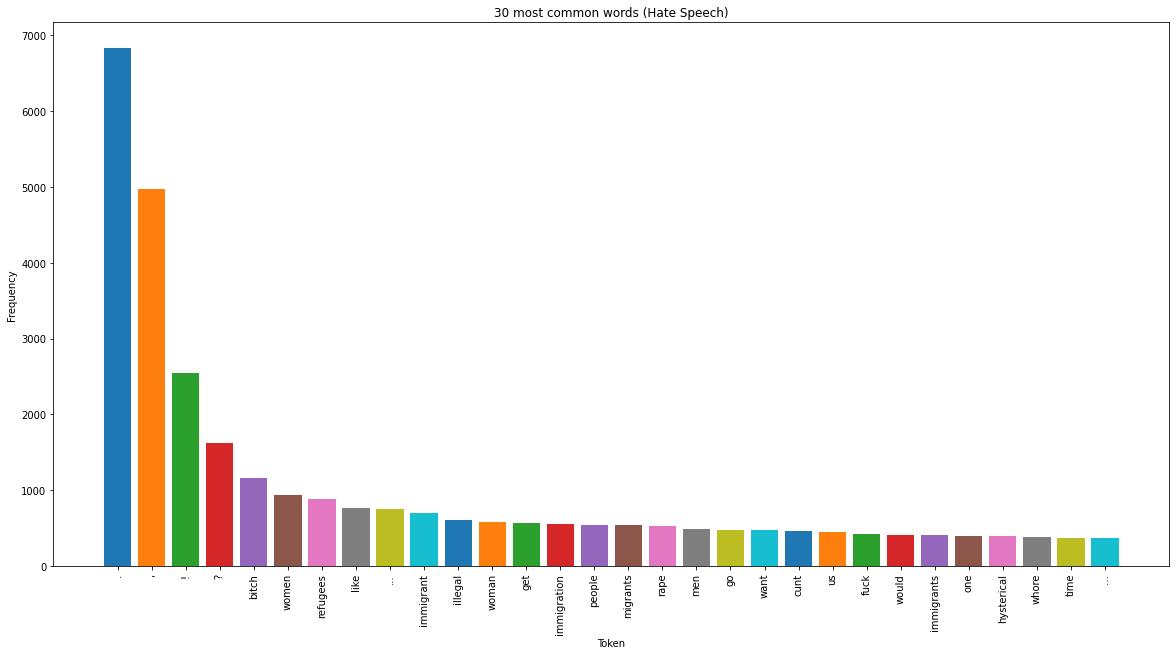

In [12]:
# Visualising the 30 most common words in the hate data set
plt.figure(figsize=(20,10))
plt.ylabel("Frequency") 
plt.xlabel("Token")
plt.xticks(rotation=90)
plt.title("30 most common words (Hate Speech)")

for row in frq_hate.head(30).itertuples():
    plt.bar(row[1], row[2])
plt.show()

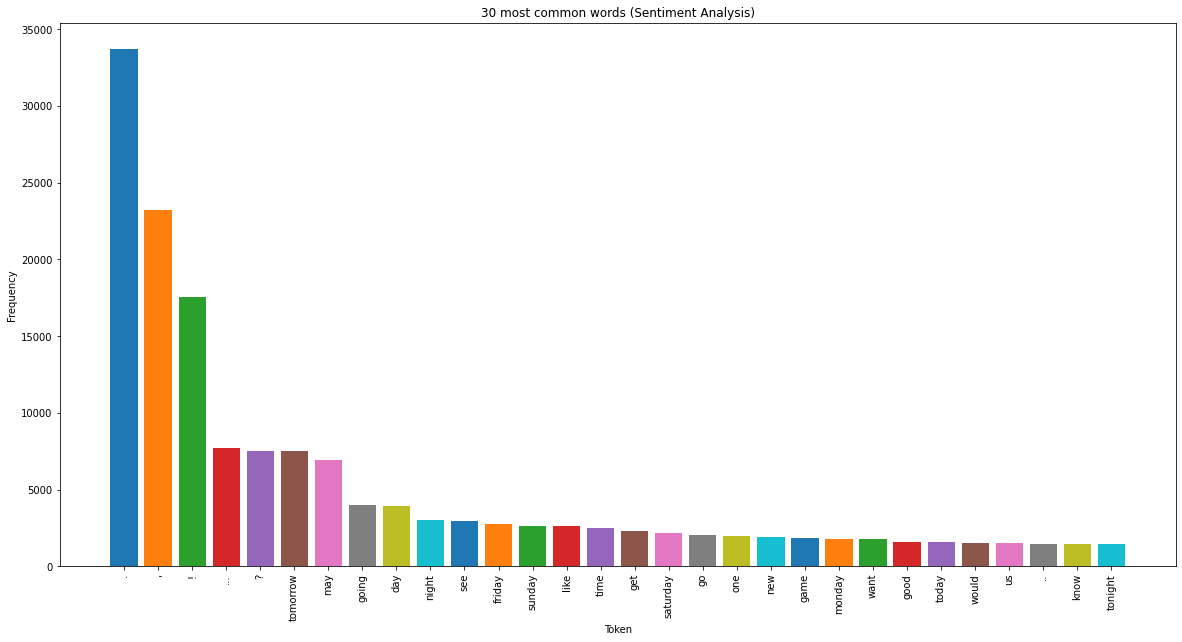

In [13]:
# Visualising the 30 most common words in the hate data set
plt.figure(figsize=(20,10))
plt.ylabel("Frequency") 
plt.xlabel("Token")
plt.xticks(rotation=90)
plt.title("30 most common words (Sentiment Analysis)")

for row in frq_sent.head(30).itertuples():
    plt.bar(row[1], row[2])
plt.show()

Examining the least common words in both data sets:

In [14]:
# 30 least common words for the hate training data set
frq_hate.iloc[-30:]

,token,frequency,idx,norm_freq,cumul_frq,log_frq,log_rank
19592,undercounting,1,19593,0.000008,0.999781,0.0,9.537952
19593,ghetto,1,19594,0.000008,0.999788,0.0,9.537952
19594,conditioning,1,19595,0.000008,0.999796,0.0,9.537952
19595,disres,1,19596,0.000008,0.999803,0.0,9.537952
19596,whisper,1,19597,0.000008,0.999811,0.0,9.537952
19597,creature-zippy,1,19598,0.000008,0.999818,0.0,9.537952
19598,therapisti,1,19599,0.000008,0.999826,0.0,9.537952
19599,aloe,1,19600,0.000008,0.999834,0.0,9.537952
19600,darlin,1,19601,0.000008,0.999841,0.0,9.537952
19601,stupud,1,19602,0.000008,0.999849,0.0,9.537952


In [15]:
# 30 least common words for the sentiment training data set
frq_sent.iloc[-30:]

,token,frequency,idx,norm_freq,cumul_frq,log_frq,log_rank
48744,buddists,1,48745,0.000002,0.999952,0.0,10.449019
48745,fertittas,1,48746,0.000002,0.999953,0.0,10.449019
48746,#raggedtalk,1,48747,0.000002,0.999955,0.0,10.449019
48747,freewheelin',1,48748,0.000002,0.999957,0.0,10.449019
48748,drillhall,1,48749,0.000002,0.999958,0.0,10.449019
48749,#skiing,1,48750,0.000002,0.999960,0.0,10.449019
48750,#newnickname,1,48751,0.000002,0.999962,0.0,10.449019
48751,motors,1,48752,0.000002,0.999963,0.0,10.449019
48752,pats',1,48753,0.000002,0.999965,0.0,10.449019
48753,pecking,1,48754,0.000002,0.999967,0.0,10.449019


Comparing corpus size, vocabulary size, and type/token ratio for the two datasets:

In [16]:
# hate training data
cor_voc_size(corpus_hate, voc_hate)

Corpus size: 132142
Vocabulary size: 19622
Type / Token Ratio: 0.148


In [17]:
# sentiment training data
cor_voc_size(corpus_sent, voc_sent)

Corpus size: 601113
Vocabulary size: 48774
Type / Token Ratio: 0.081


Plotting token frequency counts for both data sets:

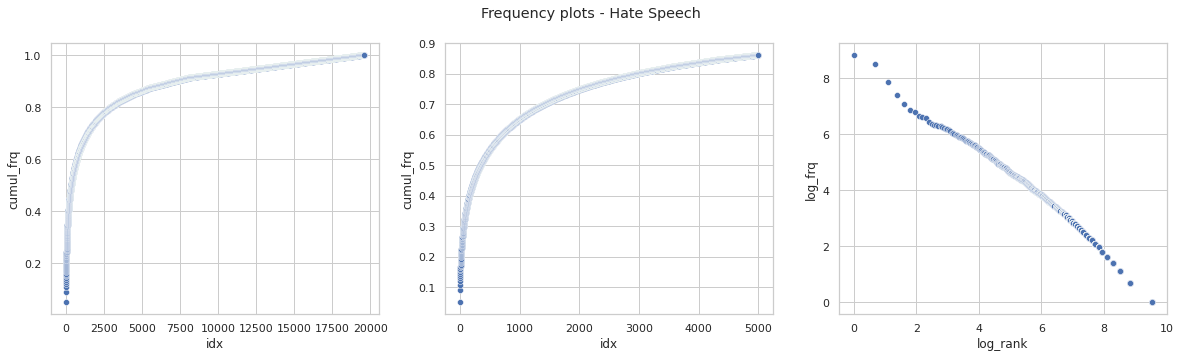

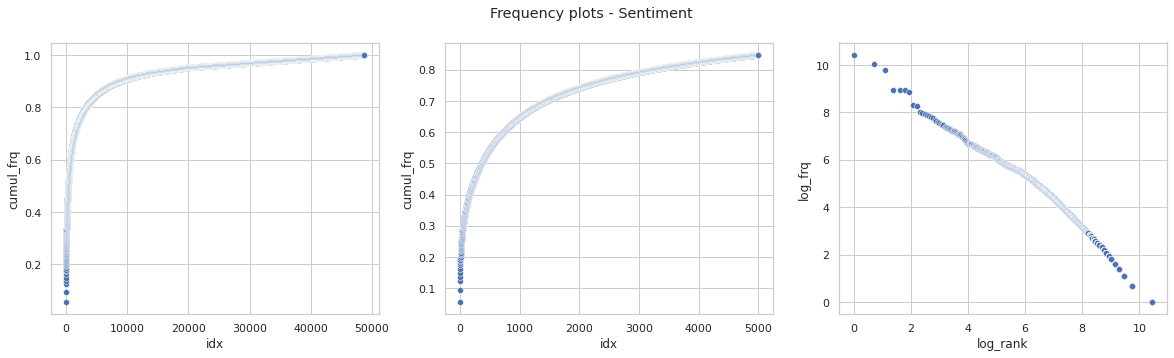

In [37]:
# Set plot style
sns.set_theme(style='whitegrid')

# Create subplots
fig1, axes1 = plt.subplots(ncols=3, figsize=(20,5))
fig2, axes2 = plt.subplots(ncols=3, figsize=(20,5))
fig1.suptitle('Frequency plots - Hate Speech')
fig2.suptitle('Frequency plots - Sentiment')

# Define coulmns and data
x = ['idx', 'idx', 'log_rank']
y = ['cumul_frq', 'cumul_frq', 'log_frq']
data_hate = [frq_hate, frq_hate[:5000], frq_hate]
data_sent = [frq_sent, frq_sent[:5000], frq_sent]

# Plot data
for i in range(3):
    sns.scatterplot(x=x[i], y=y[i], data=data_hate[i], ax=axes1[i])
    sns.scatterplot(x=x[i], y=y[i], data=data_sent[i], ax=axes2[i])

<h2 style="color:#22198A">Task 3: Manual Annotation and Inter-Annotator Agreement</h2>

<h3 style="color:green">Annotation quality control</h3>

Read all annotations into a single dataframe:

In [19]:
# Read published labels to df
original_labels = pd.read_csv("/work/fyp2021p04g13/data/raw/datasets/hate/iaa_labels.txt", delimiter = "\t", names=['original_label'])

# Read group member labels to df
group_labels = pd.read_csv("/work/fyp2021p04g13/data/raw/datasets/hate/iaa_group.labels.csv", usecols = ['A','B','C'])

# Merge df's
iaa = original_labels.merge(group_labels, left_index=True, right_index=True)

Examining the distribution of categories for each annotator:

In [20]:
for col in iaa.columns:
    print(iaa[col].value_counts(normalize=True), "\n")

0    0.675
1    0.325
Name: original_label, dtype: float64 

0    0.666667
1    0.333333
Name: A, dtype: float64 

0    0.75
1    0.25
Name: B, dtype: float64 

0    0.65
1    0.35
Name: C, dtype: float64 



<h3 style="color:green">Cohen's Kappa</h3>


Prepare input to function:

In [21]:
# Create a list of labels for each annotator
original_list = iaa['original_label'].tolist()
a_list = iaa['A'].tolist()
b_list = iaa['B'].tolist()
c_list = iaa['C'].tolist()

Running pairwise agreement:

In [22]:
col_lists = [original_list, a_list, b_list, c_list]
pairs_list = list(itertools.combinations(range(4), 2))

agreement_l = []
for pair in pairs_list:
    k = cohen_kappa(col_lists[pair[0]],col_lists[pair[1]])
    agreement_l.append(k)
    print(pair[0], "-",pair[1], ":", k) 

avg_agreement = statistics.mean(agreement_l)
print("\nAvg. pairwise annotator agreement (Cohen's Kappa):",round(avg_agreement, 3))
 

0 - 1 : 0.491
0 - 2 : 0.535
0 - 3 : 0.534
1 - 2 : 0.36
1 - 3 : 0.704
2 - 3 : 0.49

Avg. pairwise annotator agreement (Cohen's Kappa): 0.519


<h3 style="color:green">Fleiss’s Multi-π</h3>

In [23]:
# Create agreement table (df with no. of judgements for each category)
agreement_table = iaa.apply(pd.Series.value_counts, axis=1).fillna(0)

# Compute Fleiss's Kappa
print("Fleiss's Kappa:", fleiss_kappa(agreement_table))

Fleiss's Kappa: 0.5201


Comparing metrics with values computed using nltk library AnnotationTask:

In [24]:
# Prepare input for nltk
data = []
for idx, row in iaa.iterrows():
    data.append(("a1", idx, row["original_label"]))
    data.append(("a2", idx, row["A"]))
    data.append(("a3", idx, row["B"]))
    data.append(("a4", idx, row["C"]))

# Create AnnotationTask object
anno_task = agreement.AnnotationTask(data=data)

# Retrieve metrics
print("Cohen's Kappa (nltk):", anno_task.kappa())
print("Fleiss's Kappa (nltk):", anno_task.multi_kappa())

Cohen's Kappa (nltk): 0.5190450011655913
Fleiss's Kappa (nltk): 0.5212082262210798


<h2 style="color:#22198A">Task 4: Automatic Prediction</h2>
<h3 style="color:green">Examine label distribution</h3>

- Here we compared the distribution of the different labels in each data set and plot the data.
- From the plots we can clearly see that the train sentiment label distribution is quite unbalanced when it comes number of negative tweets examples which might cause some complications when evaluating it.

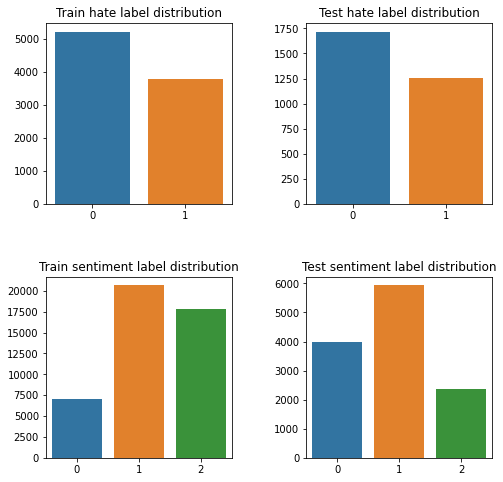

In [26]:
# Get titles
titles = ['Train hate label distribution','Test hate label distribution','Train sentiment label distribution','Test sentiment label distribution']
title_index = 0

# Get labels
all_labels = [
    Counter(loadLabels(FILEPATHS["train_labels_hate"])),
    Counter(loadLabels(FILEPATHS["test_labels_hate"])),
    Counter(loadLabels(FILEPATHS["train_labels_sentiment"])),
    Counter(loadLabels(FILEPATHS["test_labels_sentiment"]))
    ]

# Get figure
fig, axs = plt.subplots(2,2, figsize=(8,8))
fig.subplots_adjust(wspace = 0.4, hspace=0.4)

# Plot the data
for row in axs:
    for ax in row:

        # Get labels for given dataset
        labels_dict = all_labels[title_index] # Key: label Value: Count
        labels = list(labels_dict.keys())
        counts = [labels_dict[key] for key in labels_dict.keys()]
        ax = sns.barplot(x = labels, y = counts, ax = ax)

        # Set title
        ax.set_title(titles[title_index])

        # Increase title index
        title_index += 1

<h3 style="color:green">Feature extraction</h3>

- Here we define which extraction methods our classifiers will be evaluated on
- We run our loadModelData function with each of the extraction methods and transfer the outputs in to their respective dictionaries to later run with our Models

In [ ]:
# Define feature extractin methods
FEATURE_EXTRACTION_METHODS = ["CountVectorizer", "TfidfVectorizer", "LSA", "Word2Vec"]

# Key: Name of extraction method Value: X_train, X_test, y_train, y_test
# * Hate data set
FEATURES_HATE = {
    extraction_method: loadModelData("hate", FILEPATHS, method = extraction_method, skip_lines = 200) for extraction_method in FEATURE_EXTRACTION_METHODS
}

# * Sentiment data set
FEATURES_SENTIMENT = {
    extraction_method: loadModelData("sentiment", FILEPATHS, method = extraction_method, skip_lines = 200) for extraction_method in FEATURE_EXTRACTION_METHODS
}

<h2 style="color:green">Choosing the best model</h2>

<h3 style="color:orange">Hate speech</h3>

- We start by defining what metrics we want to look at, then we place all the methods with the chosen parameters we want to evaluate in dictionaries. (Two dictionaries had to be created since the Naive-Bayes classifiers only run with "CountVectorizer" and "TfidfVectorizer")

In [27]:
# Naive-Bayes type of classifiers only run with the "CountVectorizer" and "TfidfVectorizer"
# feature extractors, so we separate in to two dictionaries

# Define metrics which we are interested in
metrics_hate = ["accuracy", "precision", "recall", "f1", "f1_macro"]

CLFS_hate_without_NB = {
    "SGDClassifier_log": SGDClassifier(loss='log'),
    "SGDClassifier_hinge": SGDClassifier(loss='hinge'),
    "SVC_kernel3": SVC(kernel='poly', degree=3),
    "SVC_kernel2": SVC(kernel='poly', degree=2),
    "SVC_linear": SVC(kernel='linear')
}

CLFS_hate_with_NB = {
    "SGDClassifier_log": SGDClassifier(loss='log'),
    "SGDClassifier_hinge": SGDClassifier(loss='hinge'),
    "SVC_kernel3": SVC(kernel='poly', degree=3), 
    "SVC_kernel2": SVC(kernel='poly', degree=2),
    "SVC_linear": SVC(kernel='linear'),
    "Naive Bayes": MultinomialNB(), 
    "BernoulliNB": BernoulliNB(), 
    "ComplementNB": ComplementNB()
}

Next we loop through all our feature extractions, perform ***cross validation*** and print out a summary of the results of each different method


In [28]:
# Get summary for all Features extraction types
for extraction_method in FEATURES_HATE:

    # Get data
    X_train_hate, X_test_hate, y_train_hate, y_test_hate = FEATURES_HATE[extraction_method]

    # Start timer
    start = timeit.default_timer()
    
    # Do the cross validation
    if extraction_method in ["CountVectorizer", "TfidfVectorizer"]:
        summary, _ = crossValidate(X_train_hate, y_train_hate, CLFS_hate_with_NB, metrics_hate)
    else:
        summary, _ = crossValidate(X_train_hate, y_train_hate, CLFS_hate_without_NB, metrics_hate)

    # Show the summary
    stop = timeit.default_timer()
    print(f'Running time:{stop - start}')
    print(extraction_method)
    print(summary)
    print("=============================================================================")

Running time:417.79584158200305
CountVectorizer
       classifier_name  accuracy  precision    recall        f1  f1_macro
0    SGDClassifier_log  0.767041   0.757823  0.655583  0.702962  0.755665
1  SGDClassifier_hinge  0.759286   0.738764  0.662136  0.698145  0.748958
2          SVC_kernel3  0.588980   0.611964  0.062136  0.112639  0.422586
3          SVC_kernel2  0.635612   0.756842  0.196359  0.311607  0.531908
4           SVC_linear  0.767347   0.756047  0.659951  0.704598  0.756335
5          Naive Bayes  0.738878   0.661501  0.776214  0.714212  0.736897
6          BernoulliNB  0.629490   0.890061  0.135437  0.234781  0.495165
7         ComplementNB  0.729592   0.643297  0.800971  0.713471  0.728712
Running time:369.33719447700423
TfidfVectorizer
       classifier_name  accuracy  precision    recall        f1  f1_macro
0    SGDClassifier_log  0.749694   0.798131  0.541748  0.645211  0.725907
1  SGDClassifier_hinge  0.772551   0.781210  0.637864  0.702258  0.759121
2          SVC_k

<h3 style="color:orange">Sentiment analysis</h3>

Just like the Hate dataset we specify the metrics and create two dictionaries due to the Naive-Bayers constraint

In [29]:
metrics_sent = ["precision", "recall", "f1"]

CLFS_sent_with_NB = {
    "Naive Bayes": MultinomialNB(),
    "SGDClassifier_hinge": SGDClassifier(loss="hinge"),
    "SGDClassifier_log": SGDClassifier(loss="log"),
    'ComplementNB': ComplementNB()
}

CLFS_sent = {
    "SGDClassifier_hinge": SGDClassifier(loss="hinge"),
    "SGDClassifier_log": SGDClassifier(loss="log"),
}

Similar as we did for the Hate dataset. We loop through the feature extractions and perform ***cross validation***. But this time we print out the results for each different label, as well as an ***Overall Metrics Summary*** of all three combined for each classifier

In [31]:
# Get summary for all Features extraction types
all_cms = dict()
for extraction_method in FEATURES_SENTIMENT:

    # Get training data
    X_train_sent, _, y_train_sent, _ = FEATURES_SENTIMENT[extraction_method]

    # Run the cross validation and get the summary
    if extraction_method in ["CountVectorizer", "TfidfVectorizer"]:
        summary, overall = crossValidate(X_train_sent, y_train_sent, CLFS_sent_with_NB, metrics_sent, binary = False)
    else:
        summary, overall = crossValidate(X_train_sent, y_train_sent, CLFS_sent, metrics_sent, binary = False)

    # Show the summary
    print(extraction_method.upper())
    clf_confusion_matrix = dict()
    for clf_name in summary:
        results, confusion_matrix_final = summary[clf_name]
        clf_confusion_matrix[clf_name] = confusion_matrix_final
        print(clf_name)
        print(results)
        print()
    print()
    print("Overall metrics summary")
    print(overall)
    print()

    # Save the confusion matrices for later use
    all_cms[extraction_method] = clf_confusion_matrix

COUNTVECTORIZER
Naive Bayes
  Metrics/Classes  Negative   Neutral  Positive
0       precision  0.593314  0.635869  0.618995
1          recall  0.219932  0.649930  0.757665
2              f1  0.320798  0.642812  0.681337

SGDClassifier_hinge
  Metrics/Classes  Negative   Neutral  Positive
0       precision  0.616101  0.635594  0.706847
1          recall  0.334644  0.757995  0.677784
2              f1  0.433543  0.691390  0.691966

SGDClassifier_log
  Metrics/Classes  Negative   Neutral  Positive
0       precision  0.632826  0.632016  0.714555
1          recall  0.300068  0.778275  0.672566
2              f1  0.406746  0.697510  0.692846

ComplementNB
  Metrics/Classes  Negative   Neutral  Positive
0       precision  0.364671  0.689012  0.646927
1          recall  0.610169  0.462051  0.719849
2              f1  0.456448  0.553148  0.681423


Overall metrics summary
            Clasiffier  accuracy  f1_macro  recall_macro
0          Naive Bayes  0.625287  0.548315      0.542509
1  SGDClas

- Our best method was SGDClassifier_hinge utilizing CountVectorizer, but we can see that it had quite poor performance on recall with the negative label

- Examining the respective confusion matrix, we can see that the reason behind those values are due to the negative tweets being mislabeled as neutral. We can also see that another common mistake is classifying positive tweets with neutral

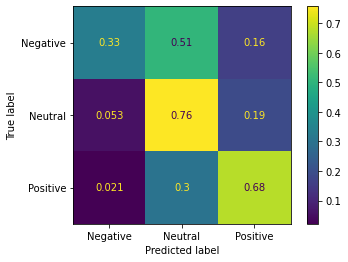

In [32]:
# Show selected confusion matrix
cm = all_cms["CountVectorizer"]["SGDClassifier_hinge"]
cm = cm / cm.astype(np.float).sum(axis=1, keepdims=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Negative", "Neutral", "Positive"])

# Show the plot
disp.plot();

# Save the plot
disp.figure_.savefig("figures/task4.png")

<h2 style="color:green">Evaluating models on test data</h2>

<h4 style="color:orange">Hate speech</h4>

In [33]:
# Get summary for all Features extraction types
for extraction_method in FEATURES_HATE:

    # Get data
    X_train_hate, X_test_hate, y_train_hate, y_test_hate = FEATURES_HATE[extraction_method]

    # Start timer
    start = timeit.default_timer()

    # Fit the classifiers
    if extraction_method in ["CountVectorizer", "TfidfVectorizer"]:
        fitted_clfs_hate = fitClassifiers(CLFS_hate_with_NB, X_train_hate, y_train_hate)

    else:
        fitted_clfs_hate = fitClassifiers(CLFS_hate_without_NB, X_train_hate, y_train_hate)

    # Get the summary
    summary = evaluateTestDataBinary(X_test_hate, y_test_hate, fitted_clfs_hate)
    stop = timeit.default_timer()

    # Show the summary
    print(f'Running time: {stop - start}')
    print(extraction_method)
    print(summary)
    print("=============================================================================")

Running time: 167.64227661999757
CountVectorizer
       classifier_name  accuracy  precision    recall        f1  f1_macro
0    SGDClassifier_log  0.522222   0.463457  0.845847  0.598813  0.504150
1  SGDClassifier_hinge  0.538384   0.472517  0.817093  0.598771  0.527685
2          SVC_kernel3  0.582828   0.518006  0.149361  0.231866  0.472762
3          SVC_kernel2  0.589562   0.516616  0.409744  0.457016  0.563555
4           SVC_linear  0.512458   0.458369  0.861821  0.598447  0.489026
5          Naive Bayes  0.465320   0.438953  0.964856  0.603397  0.391574
6          BernoulliNB  0.563636   0.475281  0.337859  0.394958  0.526863
7         ComplementNB  0.461616   0.437477  0.969649  0.602930  0.383535
Running time: 153.79466409000452
TfidfVectorizer
       classifier_name  accuracy  precision    recall        f1  f1_macro
0    SGDClassifier_log  0.524242   0.463326  0.812300  0.590078  0.511646
1  SGDClassifier_hinge  0.503704   0.453440  0.863419  0.594609  0.477426
2          SVC

<h4 style="color:orange">Sentiment</h4>

In [34]:
# Get summary for all Features extraction types
clfs_all_details = dict()
for extraction_method in FEATURES_SENTIMENT:

    # Get data
    X_train_sent, X_test_sent, y_train_sent, y_test_sent = FEATURES_SENTIMENT[extraction_method]

    # Start timer
    start = timeit.default_timer()

    # Fit the classifiers
    if extraction_method in ["CountVectorizer", "TfidfVectorizer"]:
        fitted_clfs_sent = fitClassifiers(CLFS_sent_with_NB, X_train_sent, y_train_sent)

    else:
        fitted_clfs_sent = fitClassifiers(CLFS_sent, X_train_sent, y_train_sent)

    # Get the summary
    clfs_detail, summary = evaluateTestDataMulti(X_test_sent, y_test_sent, fitted_clfs_sent)
    stop = timeit.default_timer()

    # Save details into dictionary for further lookup
    clfs_all_details[extraction_method] = clfs_detail

    # Show the summary
    print(f'Running time: {stop - start}')
    print(extraction_method)
    print(summary)
    print("=============================================================================")

Running time: 5.2407723020005506
CountVectorizer
       classifier_name  accuracy  f1_macro  recall_macro
0          Naive Bayes  0.522712  0.525133      0.553785
1  SGDClassifier_hinge  0.586210  0.527857      0.532279
2    SGDClassifier_log  0.578557  0.510229      0.523352
3         ComplementNB  0.446434  0.427001      0.499838
Running time: 2.6232185139961075
TfidfVectorizer
       classifier_name  accuracy  f1_macro  recall_macro
0          Naive Bayes  0.526132  0.397857      0.474635
1  SGDClassifier_hinge  0.536877  0.410011      0.467441
2    SGDClassifier_log  0.526539  0.384667      0.449480
3         ComplementNB  0.523527  0.525960      0.551015
Running time: 2.9892286930116825
LSA
       classifier_name  accuracy  f1_macro  recall_macro
0  SGDClassifier_hinge  0.510583  0.363505      0.430562
1    SGDClassifier_log  0.514572  0.363767      0.429750
Running time: 8.381814909022069
Word2Vec
       classifier_name  accuracy  f1_macro  recall_macro
0  SGDClassifier_hinge  0.

In [35]:
# Show a detail for specified feature extraction method and model
clfs_all_details["CountVectorizer"]["SGDClassifier_hinge"]

,Metrics/Classes,Negative,Neutral,Positive
0,precision,0.726945,0.571608,0.554673
1,recall,0.254028,0.843018,0.499789
2,f1,0.376493,0.681277,0.525803


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0dd92353-c33e-4f0a-a863-89d0a125a6a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>